# Importing all modules which we need to use latter

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.nonparametric.kde import KDEUnivariate
from statsmodels.nonparametric import smoothers_lowess
from pandas import Series, DataFrame
from patsy import dmatrices
from sklearn import datasets, svm


# Use pandas for reading 

In [2]:
#with open('SPECTF.dat','r') as f:
#    next(f) # skip first row
#    df = pd.DataFrame(np.array(l.split(',')).astype(int) for l in f)
#    
#df = df.drop(44, axis=1) #for deleteing tha last '\n' character
#df.rename(columns={0:'Label'}, inplace=True)


# Use custom csv_utils for reading

In [3]:
from csv_utils import read_csv

In [4]:
df,cols = read_csv('data/SPECTF.dat')

In [5]:
df = pd.DataFrame(df, dtype=float )
df.rename(columns={0:'Label'}, inplace=True)
df

,Label,1,2,3,4,5,6,7,8,9,...,35,36,37,38,39,40,41,42,43,44
0,1.0,59.0,52.0,70.0,67.0,73.0,66.0,72.0,61.0,58.0,...,66.0,56.0,62.0,56.0,72.0,62.0,74.0,74.0,64.0,67.0
1,1.0,72.0,62.0,69.0,67.0,78.0,82.0,74.0,65.0,69.0,...,65.0,71.0,63.0,60.0,69.0,73.0,67.0,71.0,56.0,58.0
2,1.0,71.0,62.0,70.0,64.0,67.0,64.0,79.0,65.0,70.0,...,73.0,70.0,66.0,65.0,64.0,55.0,61.0,41.0,51.0,46.0
3,1.0,69.0,71.0,70.0,78.0,61.0,63.0,67.0,65.0,59.0,...,61.0,61.0,66.0,65.0,72.0,73.0,68.0,68.0,59.0,63.0
4,1.0,70.0,66.0,61.0,66.0,61.0,58.0,69.0,69.0,72.0,...,67.0,69.0,70.0,66.0,70.0,64.0,60.0,55.0,49.0,41.0
5,1.0,57.0,69.0,68.0,75.0,69.0,74.0,73.0,71.0,57.0,...,63.0,58.0,69.0,67.0,79.0,77.0,72.0,70.0,61.0,65.0
6,1.0,69.0,66.0,62.0,75.0,67.0,71.0,72.0,76.0,69.0,...,69.0,70.0,72.0,72.0,69.0,68.0,70.0,73.0,63.0,59.0
7,1.0,61.0,60.0,60.0,62.0,64.0,72.0,68.0,67.0,74.0,...,66.0,66.0,66.0,60.0,60.0,58.0,60.0,67.0,49.0,52.0
8,1.0,65.0,62.0,67.0,68.0,65.0,67.0,71.0,71.0,64.0,...,67.0,63.0,74.0,63.0,77.0,79.0,68.0,70.0,59.0,56.0
9,1.0,74.0,73.0,72.0,79.0,66.0,61.0,76.0,66.0,65.0,...,64.0,62.0,73.0,69.0,62.0,67.0,60.0,56.0,53.0,46.0


# Let's take a look:¶
First row in dataset presented below

In [6]:
print(list(df.iloc[0]))

[1.0, 59.0, 52.0, 70.0, 67.0, 73.0, 66.0, 72.0, 61.0, 58.0, 52.0, 72.0, 71.0, 70.0, 77.0, 66.0, 65.0, 67.0, 55.0, 61.0, 57.0, 68.0, 66.0, 72.0, 74.0, 63.0, 64.0, 56.0, 54.0, 67.0, 54.0, 76.0, 74.0, 65.0, 67.0, 66.0, 56.0, 62.0, 56.0, 72.0, 62.0, 74.0, 74.0, 64.0, 67.0]


## Each row has a same length and there are no NaN elements in our data

In [7]:
print('Length of row 0 = {}'.format(len(np.array(df.iloc[0]))))
print('Length of row 263 = {}'.format(len(np.array(df.iloc[263]))))

Length of row 0 = 45
Length of row 263 = 45


# Let's take a Look at our data graphically:¶

In [106]:
# specifies the parameters of our graphs
fig = plt.figure(figsize=(18,6), dpi=1600) 
alpha=alpha_scatterplot = 0.2 
alpha_bar_chart = 0.55

# lets us plot many diffrent shaped graphs together 
ax1 = plt.subplot2grid((2,3),(0,0))
# plots a bar graph of those who has label 1 vs those who has label 0.               
df.Label.value_counts().plot(kind='bar', alpha=alpha_bar_chart)
# this nicely sets the margins in matplotlib to deal with a recent bug 1.3.1
ax1.set_xlim(-1, 2)
# puts a title on our graph
plt.title("Distribution of '1'")  

plt.subplot2grid((2,3),(0,1))
plt.scatter(df.Label, df[1], alpha=alpha_scatterplot)
# sets the y axis lable
plt.ylabel("Column 1")
# formats the grid line style of our graphs                          
plt.grid(b=True, which='major', axis='y')  
plt.title("Labels by Column 1")

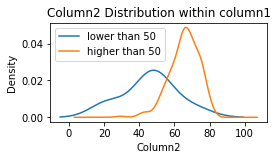

In [107]:
plt.subplot2grid((2,3),(1,0), colspan=2)
# plots a kernel density estimate of the subset of the 1st class passangers's age
df[2][df[1] <=50 ].plot(kind='kde')    
df[2][df[1] >50  ].plot(kind='kde')
 # plots an axis lable
plt.xlabel("Column2")    
plt.title("Column2 Distribution within column1")
# sets our legend for our graph.
plt.legend(('lower than 50', 'higher than 50'),loc='best')

# Exploratory Visualization:¶
The point of this competition is to predict if a smaple of data(row) has label '1' based on the features in the data like:

Column 1

Column 2

...

Column 43

Column 44



Let’s see if we can gain a better understanding of who has 1 label and who has 0 label.

First let’s plot a bar graph of those who has '1' Vs. Those who has '0'.

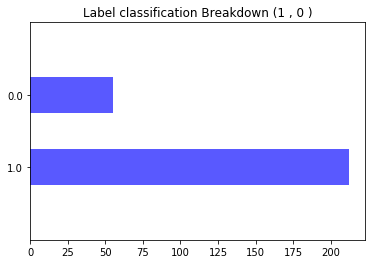

In [108]:
plt.figure(figsize=(6,4))
fig, ax = plt.subplots()
df.Label.value_counts().plot(kind='barh', color="blue", alpha=.65)
ax.set_ylim(-1, len(df.Label.value_counts())) 
plt.title("Label classification Breakdown (1 , 0 )")

(-1, 2)

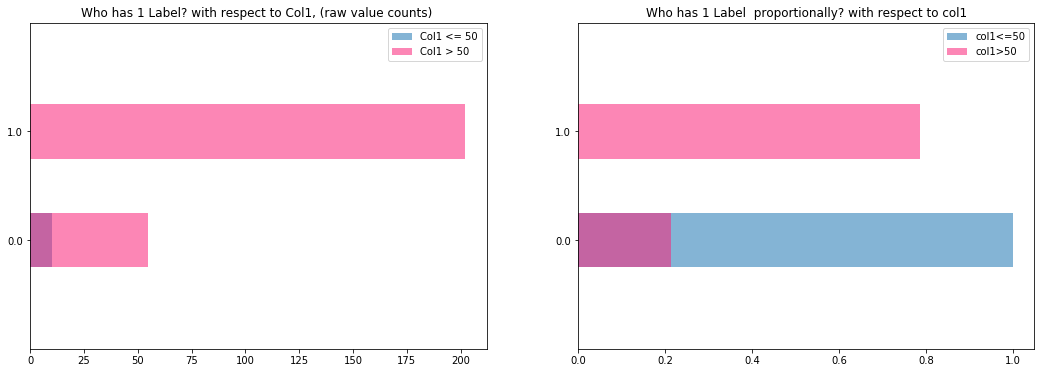

In [110]:
fig = plt.figure(figsize=(18,6))

#create a plot of two subsets, column1 and column2, of the 1's labeled variable.
#After we do that we call value_counts() so it can be easily plotted as a bar graph. 
#'barh' is just a horizontal bar graph
df_col1_low_than_50 = df.Label[df[1] <=50].value_counts().sort_index()
df_col1_high_than_50 = df.Label[df[1] > 50].value_counts().sort_index()

ax1 = fig.add_subplot(121)
df_col1_low_than_50.plot(kind='barh',label='Col1 <= 50', alpha=0.55)
df_col1_high_than_50.plot(kind='barh', color='#FA2379',label='Col1 > 50', alpha=0.55)
plt.title("Who has 1 Label? with respect to Col1, (raw value counts) "); plt.legend(loc='best')
ax1.set_ylim(-1, 2) 

#adjust graph to display the proportions of survival by gender
ax2 = fig.add_subplot(122)
(df_col1_low_than_50/float(df_col1_low_than_50.sum())).plot(kind='barh',label='col1<=50', alpha=0.55)  
(df_col1_high_than_50/float(df_col1_high_than_50.sum())).plot(kind='barh', color='#FA2379',label='col1>50', alpha=0.55)
plt.title("Who has 1 Label  proportionally? with respect to col1"); plt.legend(loc='best')

ax2.set_ylim(-1, 2)




Here it's clear to see that if col1 > 50 then  we can say with 100% accurancy that sample has label '1'
And if col1<=50 the rate of 1's labels proportionally (~20%) vs 0's labels (~80%)

# Great! But let’s go down even further:

Above we consider only Ccolumn 1 to analyse sample's label . Now we should consider column1 and column2 to predict sample's label.

In [111]:
fig = plt.figure(figsize=(18,4), dpi=1600)
alpha_level = 0.65

# building on the previous code, here we create an additional subset with in the gender subset 
# we created for the survived variable. I know, thats a lot of subsets. After we do that we call 
# value_counts() so it it can be easily plotted as a bar graph. this is repeated for each gender 
# class pair.
ax1=fig.add_subplot(141)
col1gr50_col2gr50 = df.Label[df[1] >= 50][df[2] >=50].value_counts()
col1gr50_col2gr50.plot(kind='bar', label='Col1>=50, Col2>=50', color='#FA2479', alpha=alpha_level)
ax1.set_xticklabels(["1", "0"], rotation=0)
ax1.set_xlim(-1, len(col1gr50_col2gr50))
plt.title("Who has label 1? with respect to Col1 and Col2"); plt.legend(loc='best')

ax2=fig.add_subplot(142, sharey=ax1)
col1gr50_col2ls50 = df.Label[df[1] >= 50][df[2] <50].value_counts()
col1gr50_col2ls50.plot(kind='bar', label='Col1>=50, Col2<50', color='pink', alpha=alpha_level)
ax2.set_xticklabels(["0","1"], rotation=0)
ax2.set_xlim(-1, len(col1gr50_col2ls50))
plt.legend(loc='best')

ax3=fig.add_subplot(143, sharey=ax1)
col1ls50_col2gr50 = df.Label[df[1] < 50][df[2] >=50].value_counts()
col1ls50_col2gr50.plot(kind='bar', label='Col1<50, Col2>=50',color='lightblue', alpha=alpha_level)
ax3.set_xticklabels(["0","1"], rotation=0)
ax3.set_xlim(-1, len(col1ls50_col2gr50))
plt.legend(loc='best')

ax4=fig.add_subplot(144, sharey=ax1)
col1ls50_col2ls50 = df.Label[df[1] < 50][df[2] <50].value_counts()
col1ls50_col2ls50.plot(kind='bar', label='Col1<50, Col2<50', alpha=alpha_level, color='steelblue')
ax4.set_xticklabels(["0","1"], rotation=0)
ax4.set_xlim(-1, len(col1ls50_col2ls50))
plt.legend(loc='best')

Now we can conclude that if one of col1 or col2 is small than 50 than the label is likely equal to '1'. 

# # Logistic Regression using Sklearn

Prepare Data for Logistic Regression

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn.cross_validation import cross_val_score

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [9]:
colums = np.arange(1,45)
columns = tuple(['c' + str(i) for i in range(1, len(colums)+2)])
columns_dict = {}

for i, c in enumerate(columns):
    columns_dict[i] = c

df.rename(columns=columns_dict, inplace=True)

df

,Label,c2,c3,c4,c5,c6,c7,c8,c9,c10,...,c36,c37,c38,c39,c40,c41,c42,c43,c44,c45
0,1.0,59.0,52.0,70.0,67.0,73.0,66.0,72.0,61.0,58.0,...,66.0,56.0,62.0,56.0,72.0,62.0,74.0,74.0,64.0,67.0
1,1.0,72.0,62.0,69.0,67.0,78.0,82.0,74.0,65.0,69.0,...,65.0,71.0,63.0,60.0,69.0,73.0,67.0,71.0,56.0,58.0
2,1.0,71.0,62.0,70.0,64.0,67.0,64.0,79.0,65.0,70.0,...,73.0,70.0,66.0,65.0,64.0,55.0,61.0,41.0,51.0,46.0
3,1.0,69.0,71.0,70.0,78.0,61.0,63.0,67.0,65.0,59.0,...,61.0,61.0,66.0,65.0,72.0,73.0,68.0,68.0,59.0,63.0
4,1.0,70.0,66.0,61.0,66.0,61.0,58.0,69.0,69.0,72.0,...,67.0,69.0,70.0,66.0,70.0,64.0,60.0,55.0,49.0,41.0
5,1.0,57.0,69.0,68.0,75.0,69.0,74.0,73.0,71.0,57.0,...,63.0,58.0,69.0,67.0,79.0,77.0,72.0,70.0,61.0,65.0
6,1.0,69.0,66.0,62.0,75.0,67.0,71.0,72.0,76.0,69.0,...,69.0,70.0,72.0,72.0,69.0,68.0,70.0,73.0,63.0,59.0
7,1.0,61.0,60.0,60.0,62.0,64.0,72.0,68.0,67.0,74.0,...,66.0,66.0,66.0,60.0,60.0,58.0,60.0,67.0,49.0,52.0
8,1.0,65.0,62.0,67.0,68.0,65.0,67.0,71.0,71.0,64.0,...,67.0,63.0,74.0,63.0,77.0,79.0,68.0,70.0,59.0,56.0
9,1.0,74.0,73.0,72.0,79.0,66.0,61.0,76.0,66.0,65.0,...,64.0,62.0,73.0,69.0,62.0,67.0,60.0,56.0,53.0,46.0


In [10]:
# model formula
# here the ~ sign is an = sign, and the features of our dataset
# are written as a formula to predict survived. The C() lets our 
# regression know that those variables are categorical.
# Ref: http://patsy.readthedocs.org/en/latest/formulas.html
#formula = 'Label ~ C(Pclass) + C(Sex) + Age + SibSp  + C(Embarked)' 
formula = 'Label ~ '

formula += '+'.join(['c' + str(i) for i in range(2, len(colums)+2)])

print(formula)
# create a results dictionary to hold our regression results for easy analysis later        
results = {}


Label ~ c2+c3+c4+c5+c6+c7+c8+c9+c10+c11+c12+c13+c14+c15+c16+c17+c18+c19+c20+c21+c22+c23+c24+c25+c26+c27+c28+c29+c30+c31+c32+c33+c34+c35+c36+c37+c38+c39+c40+c41+c42+c43+c44+c45


In [11]:
# create a regression friendly dataframe using patsy's dmatrices function
y,x = dmatrices(formula, data=df, return_type='dataframe')
print (x.columns)

Index(['Intercept', 'c2', 'c3', 'c4', 'c5', 'c6', 'c7', 'c8', 'c9', 'c10',
       'c11', 'c12', 'c13', 'c14', 'c15', 'c16', 'c17', 'c18', 'c19', 'c20',
       'c21', 'c22', 'c23', 'c24', 'c25', 'c26', 'c27', 'c28', 'c29', 'c30',
       'c31', 'c32', 'c33', 'c34', 'c35', 'c36', 'c37', 'c38', 'c39', 'c40',
       'c41', 'c42', 'c43', 'c44', 'c45'],
      dtype='object')


# Model Evaluation Using a Validation Set

So far, we have trained and tested on the same set. Let's instead split the data into a training set and a testing set.

In [73]:
# evaluate the model by splitting into train and test sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)
model2 = LogisticRegression()
model2.fit(X_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

We now need to predict class labels for the test set

In [74]:
# predict class labels for the test set
predicted = model2.predict(X_test)
print (predicted)

[ 1.  1.  1.  0.  0.  0.  0.  0.  1.  1.  0.  1.  1.  1.  1.  0.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  0.  1.  1.  1.  0.  1.  0.  0.  0.  0.  1.  1.  1.  1.  1.]


In [75]:
# generate class probabilities
probs = model2.predict_proba(X_test)
print (probs[:10])

[[ 0.45640005  0.54359995]
 [ 0.16075142  0.83924858]
 [ 0.03188155  0.96811845]
 [ 0.75146715  0.24853285]
 [ 0.80767051  0.19232949]
 [ 0.93847409  0.06152591]
 [ 0.74642548  0.25357452]
 [ 0.68499218  0.31500782]
 [ 0.27789819  0.72210181]
 [ 0.08155294  0.91844706]]


As you can see, the classifier is predicting a 1  any time the probability in the second column is greater than 0.5.

Now let's generate some evaluation metrics.

In [76]:
# generate evaluation metrics
print (metrics.accuracy_score(y_test, predicted))
print (metrics.roc_auc_score(y_test, probs[:, 1]))

0.796296296296
0.834090909091


# Camparing with my Logistic Regression

It uses Stohastic gradient discent

In [77]:
from logistic import logistic_predict

In [78]:
def accuracy_score(Y_true, Y_predict):
    """
    Param: Y_true real labels
    Param : Y_predict predicted lables
    Process: Calculate accuracy_score
    """
    correct = 0
    for i in range(len(Y_true)):
        if Y_true[i] == Y_predict[i]:
            correct += 1
    return correct/(len(Y_true))

In [79]:
# Load Data
filename = 'data/SPECTF.dat'
data = np.loadtxt(filename, delimiter=',')
my_X = data[:, 1:]
my_y = np.array([data[:, 0]]).T
n = my_X.shape[0]

k_folds = 5
n = int(my_X.shape[0]/k_folds)* k_folds

In [80]:
idx = np.arange(n)
np.random.seed(1)
np.random.shuffle(idx)
indexes = np.split(idx, k_folds)

In [81]:
train_set = list(indexes)
           
a = train_set[1]
train_set.pop(1)


my_Xtest = my_X[a]
my_ytest = my_y[a]

my_Xtrain = []
my_ytrain = []
for ff in train_set:
    for row1, row2 in zip(my_X[ff], my_y[ff]):
        my_Xtrain.append(row1)
        my_ytrain.append(row2)


In [82]:
# train by logostic regrresion
y_pred = logistic_predict(my_Xtrain, my_ytrain, my_Xtest, my_ytest)
accuracy = accuracy_score(my_ytest, y_pred)
print(accuracy)

0.7924528301886793


# Random Forest using Sklearn

In [92]:
# import the machine learning library that holds the randomforest
import sklearn.ensemble as ske

# Create the random forest model and fit the model to our training data
y, x = dmatrices(formula, data=df, return_type='dataframe')


# evaluate the model by splitting into train and test sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=2)
y_train = np.asarray(y_train).ravel()

results_rf = ske.RandomForestClassifier(n_estimators=30).fit(X_train, y_train)

score = results_rf.score(X_test, y_test)
score

0.90123456790123457

# Camparing with my Random Forest

In [99]:
from random_forest import RandomForest

#train the random forest
classifier = RandomForest(10, 50, 0.25)
classifier.fit(my_Xtrain, my_ytrain)
y_pred = classifier.predict(my_Xtest)
accuracy = accuracy_score(my_ytest, y_pred)
accuracy

0.8490566037735849

# Summary

In [100]:
d = {
    'Classifier params'   : pd.Series(['random_state=1',('step_size=1e-2 ' 'max_steps=2500'),('n_estimators=30','random_state=2'), ('num_tress =10','max_depth = 50')], index=['LogReg', 'my_LogReg', 'RandForest', 'my_Randforest']),
     'Train Dataset size' : pd.Series([0.8, 0.8, 0.8, 0.8],     index=['LogReg', 'my_LogReg', 'RandForest', 'my_Randforest']),
     'Test Dataset Size'  : pd.Series([0.2, 0.2, 0.2, 0.2], index=['LogReg', 'my_LogReg', 'RandForest', 'my_Randforest']),
     'Accuracy'           : pd.Series([0.796296296296,0.7924528301886793, 0.90123456790123457, 0.8490566037735849], index=['LogReg', 'my_LogReg', 'RandForest', 'my_Randforest'])
    }



In [101]:
summ = pd.DataFrame(d)
summ

,Accuracy,Classifier params,Test Dataset Size,Train Dataset size
LogReg,0.796296,random_state=1,0.2,0.8
my_LogReg,0.792453,step_size=1e-2 max_steps=2500,0.2,0.8
RandForest,0.901235,"(n_estimators=30, random_state=2)",0.2,0.8
my_Randforest,0.849057,"(num_tress =10, max_depth = 50)",0.2,0.8
